# Dijkstra's algorithm: mobile robot path planning problem

The notebook aims to study and apply the **Dijkstra's algorithm** for finding the shorthest path for a mobile robot navigating in a known 2D space (map) from a starting point to a goal point. The map contains obstacles and free positions.

Recall that Dijkstra's algorithm is used to find the shortest path from a source node to all other nodes in a weighted, directed graph (with non-negative edge weights).






# Import libraries

In [1]:
# Import the packages that we will be using
import matplotlib.pyplot as plt
import numpy as np
import heapq


# 1) The map



### Create a map

Let's create an array for the map with:

- `0`: an open path (can walk through)
- `1`: a wall (cannot pass through)


In [2]:
# Define array for the map
map = np.array([
    [0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 1, 0, 1, 1, 1],
    [0, 1, 0, 0, 0, 0],
])


Undertanding the array `map`

In [3]:
# Number of rows
Nrows = map.shape[0]

# Number of columns (assuming all rows have the same number of elements)
Ncols = map.shape[0]

# Print information about "map" (Type of object, Nrows,Ncols )
print(f"Information about the variable `map´")
print(f"   Type of variable:  {type(map)}")
print(f"   Number of rows:    {Nrows}")
print(f"   Number of columns: {Ncols}")


Information about the variable `map´
   Type of variable:  <class 'numpy.ndarray'>
   Number of rows:    6
   Number of columns: 6


### Plot map

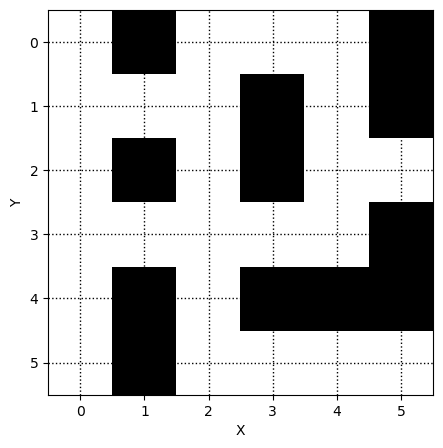

In [4]:
# Plot the map
plt.figure(figsize=(5, 5))
plt.imshow(map, cmap='gray_r')

# Set params
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(range(0,map.shape[0]))
plt.yticks(range(0,map.shape[1]))

plt.grid(color='k', linestyle=':', linewidth=1)
plt.show()


### Define start and goal

In [5]:
# Define start and goal
start = (0, 0)  # Starting point
goal  = (5, 5)  # Goal point


### Plot map, start and goal

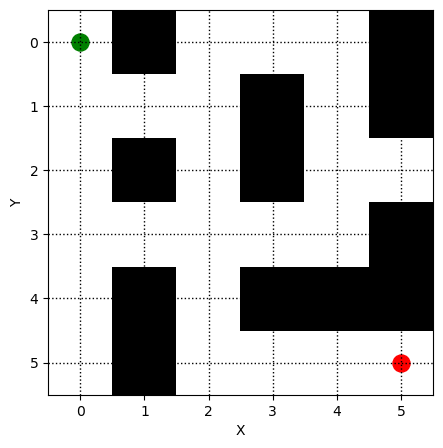

In [6]:
# Plot the map
plt.figure(figsize=(5, 5))
plt.imshow(map, cmap='gray_r')

# Plot start and goal
plt.scatter(start[1], start[0], color='green', s=150, label='Start')
plt.scatter(goal[1], goal[0], color='red', s=150, label='Goal')

# Set params
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(range(0,map.shape[0]))
plt.yticks(range(0,map.shape[1]))

plt.grid(color='k', linestyle=':', linewidth=1)
plt.show()


### Create a path

In [7]:
path = [
 (0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 3), (0, 4), (1, 4),
 (2, 4), (3, 4), (3, 3), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5)
 ]

### Plot map, start, goal and path

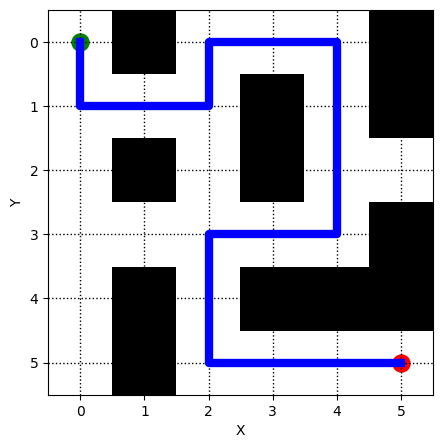

In [8]:
# Plot the map
plt.figure(figsize=(5, 5))
plt.imshow(map, cmap='gray_r')

# Plot start and goal
plt.scatter(start[1], start[0], color='green', s=150, label='Start')
plt.scatter(goal[1], goal[0], color='red', s=150, label='Goal')

# Plot the path
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='blue', linewidth=6, label='Path')

# Set params
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(range(0,map.shape[0]))
plt.yticks(range(0,map.shape[1]))

plt.grid(color='k', linestyle=':', linewidth=1)
plt.show()


Note that this is not the shortest path

# 2) Dijkstra algorithm

In [9]:
def dijkstra(map, start, goal):
    nrows, ncols = map.shape
    sr, sc = start
    gr, gc = goal

    # Si inicio o meta son muros, no hay ruta
    if map[sr, sc] == 1 or map[gr, gc] == 1:
        return []

    INF = 10**9
    dist = np.full((nrows, ncols), INF, dtype=np.int32)
    prev = np.full((nrows, ncols, 2), -1, dtype=np.int32)  # para reconstruir ruta

    dist[sr, sc] = 0
    pq = [(0, sr, sc)]  # (costo, r, c)

    # Movimientos 4-conectados
    moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while pq:
        d, r, c = heapq.heappop(pq)
        if d != dist[r, c]:
            continue  # entrada obsoleta

        if (r, c) == (gr, gc):
            break  # ya llegamos a la meta con el menor costo

        for dr, dc in moves:
            nr, nc = r + dr, c + dc
            if 0 <= nr < nrows and 0 <= nc < ncols and map[nr, nc] == 0:
                nd = d + 1  # costo unitario por paso
                if nd < dist[nr, nc]:
                    dist[nr, nc] = nd
                    prev[nr, nc] = [r, c]
                    heapq.heappush(pq, (nd, nr, nc))

    # Reconstruir la ruta si existe
    if dist[gr, gc] == INF:
        return []  # no hay camino

    path = []
    r, c = gr, gc
    while (r, c) != (sr, sc):
        path.append((r, c))
        r, c = prev[r, c]
    path.append((sr, sc))
    path.reverse()
    return path




# 3) Run de code

In [26]:
# Select one of the maps
TipoMap = 1 # (1,2)


In [27]:
# Define map and start and goal
if TipoMap==1:
  # Define map
  map = np.array([
      [0, 1, 0, 0, 0, 1],
      [0, 0, 0, 1, 0, 1],
      [0, 1, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 1],
      [0, 1, 0, 1, 1, 1],
      [0, 1, 0, 0, 0, 0],
  ])

  # Define start and goal
  start = (0, 0)  # Starting point
  goal  = (5, 5)  # Goal point

elif TipoMap==2:
  map = np.array([
      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
      [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
      [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
      [1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
      [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1],
      [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1],
      [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1],
      [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      [1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
      [1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1],
      [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
      [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
      [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  ])

  # Define start and goal
  start = (1, 1)  # Starting point
  goal  = (14, 14) # Goal point}


In [28]:
# Find the shortest path
path = dijkstra(map, start, goal)


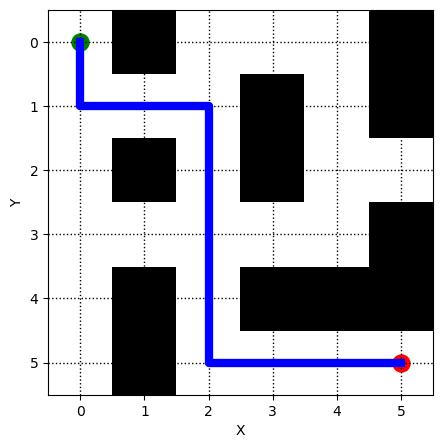

In [ ]:
# Plot the map
plt.figure(figsize=(5, 5))
plt.imshow(map, cmap='gray_r')

# Plot start and goal
plt.scatter(start[1], start[0], color='green', s=150, label='Start')
plt.scatter(goal[1], goal[0], color='red', s=150, label='Goal')

# Plot the path
if path:
    path_x, path_y = zip(*path)
    plt.plot(path_y, path_x, color='blue', linewidth=6, label='Path')

# Set params
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(range(0,map.shape[0]))
plt.yticks(range(0,map.shape[1]))

plt.grid(color='k', linestyle=':', linewidth=1)
plt.show()


## Conclusiones y Aprendizajes 

El algoritmo de Dijkstra nos enseña que siempre se puede encontrar el camino más corto entre un punto inicial y la meta en un mapa, representando los obstáculos como 1 y los espacios libres como 0. En la robótica móvil esto es muy útil porque traduce el problema físico a un grafo que se puede resolver con programación. Sin embargo, también se aprende que tiene limitaciones, ya que en mapas grandes es más lento y explora nodos innecesarios, por lo que en la práctica se usan otros algoritmos como A*. También se observa que la forma en que definimos los vecinos (arriba, abajo, diagonales) influye en el camino, y que es muy importante guardar los nodos previos para reconstruir la ruta. Usar heapq ayuda a hacer la búsqueda más eficiente y graficar con matplotlib permite verificar claramente si el camino es correcto. En general, el aprendizaje es que este tipo de problemas combinan teoría de grafos, programación y visualización, algo fundamental para robótica, inteligencia artificial y hasta videojuegos.